# Multiple linear regression to model the specific mass balance

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import statsmodels.api as sm
from matplotlib.patches import Patch
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_predict
from sklearn import metrics
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.diagnostic import het_white
from statsmodels.formula.api import ols

In [2]:
# Read dataframe
df2000_2020 = pd.read_csv('C:/Users/david/Documents/Thesis/Data/df2000_2020_imp.csv')

In [286]:
# Set the features (represented as X) and the label (represented as y):
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
numerical = df2000_2020[['velocity_mean','avg_ice_thickness', 'debris_area_ela_p',
       'Slope', 'Aspect', 'Area', 'Zmed', 'ice_volume','debris_vol_ela_p',
       'tstar_aar', 'temp_diff_2000_2020', 'temp_mean_2000_2020',
       'prcp_diff_2000_2020', 'prcp_mean_2000_2020','temp_diff_1980-2000','prcp_diff_1980_2000']]
list_numerical = numerical.columns
df = pd.concat([df2000_2020[['dmdtda','dvoldt', 'glacial_lake', 'surging']],numerical], axis=1)

# Z-score the independent variables
scaler = StandardScaler().fit(df2000_2020[list_numerical]) 

df[list_numerical] = scaler.transform(df[list_numerical])

df = df.dropna(how='any',axis=0) 


# Labels are the values we want to predict
y = df['dmdtda']

X = df[['temp_mean_2000_2020','temp_diff_2000_2020','temp_diff_1980-2000',
        'prcp_mean_2000_2020', 'prcp_diff_2000_2020', 'prcp_diff_1980_2000',
        'Area', 'Slope', 'Aspect', 'Zmed',
        'avg_ice_thickness', 'debris_area_ela_p', 'tstar_aar', 
        'glacial_lake', 'velocity_mean', 'surging']]
# Saving feature names for later use
feature_list = list(X.columns)


# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 32389
)


## Run multiple linear regression model with original data

In [154]:
#Model statistics
#Must add constant for y-intercept
model = sm.OLS(df2000_2020['dmdtda'], sm.add_constant(df2000_2020[['temp_mean_2000_2020','temp_diff_2000_2020','temp_diff_1980-2000',
        'prcp_mean_2000_2020', 'prcp_diff_2000_2020', 'prcp_diff_1980_2000',
        'Area', 'Slope', 'Aspect', 'Zmed',
        'avg_ice_thickness', 'debris_area_ela_p', 'tstar_aar', 
        'glacial_lake', 'velocity_mean', 'surging']])).fit()
print_model = model.summary()
print(print_model)
print(model.aic)

                            OLS Regression Results                            
Dep. Variable:                 dmdtda   R-squared:                       0.308
Model:                            OLS   Adj. R-squared:                  0.307
Method:                 Least Squares   F-statistic:                     224.7
Date:                Sun, 19 Jun 2022   Prob (F-statistic):               0.00
Time:                        15:20:47   Log-Likelihood:                -325.82
No. Observations:                8099   AIC:                             685.6
Df Residuals:                    8082   BIC:                             804.6
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.8301    

## Run multiple linear regression model with Z-scored data

In [297]:
#Must add constant for y-intercept
model = sm.OLS(y, sm.add_constant(X)).fit()
print_model = model.summary()
print(print_model)
print(model.aic)

                            OLS Regression Results                            
Dep. Variable:                 dmdtda   R-squared:                       0.308
Model:                            OLS   Adj. R-squared:                  0.307
Method:                 Least Squares   F-statistic:                     224.7
Date:                Tue, 21 Jun 2022   Prob (F-statistic):               0.00
Time:                        12:53:55   Log-Likelihood:                -325.82
No. Observations:                8099   AIC:                             685.6
Df Residuals:                    8082   BIC:                             804.6
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.2053    

## Plot beta coefficients

In [474]:
model_params = model.params.sort_values(ascending=False)
df = model_params.to_frame()
df = df.reset_index(level=0)
df = df.rename(columns={"index": "Name", 0:'values'})
df.loc[[0,1,2,3,4,5,6,12,13,14,15,16],'p_values'] = 'p ≤ 0.001'
df.loc[[11],'p_values'] = '0.001 < p < 0.01'
df.loc[[7, 10],'p_values'] = '0.01 < p < 0.1'
df.loc[[8,9,],'p_values'] = 'p ≥ 0.1'

df

,Name,values,p_values
0,Slope,0.073824,p ≤ 0.001
1,temp_diff_2000_2020,0.051166,p ≤ 0.001
2,tstar_aar,0.049676,p ≤ 0.001
3,temp_diff_1980-2000,0.023715,p ≤ 0.001
4,prcp_diff_2000_2020,0.018436,p ≤ 0.001
5,Aspect,0.009940,p ≤ 0.001
6,surging,0.009721,p ≤ 0.001
7,debris_area_ela_p,0.007011,0.01 < p < 0.1
8,velocity_mean,-0.000184,p ≥ 0.1
9,avg_ice_thickness,-0.001822,p ≥ 0.1


In [475]:
colors_dict = {'p ≤ 0.001':'#F45C7B','0.001 < p < 0.01':'#EEDE1E', '0.01 < p < 0.1':'#FFFA00','p ≥ 0.1':'#949494'}
colors = [colors_dict[i] for i in df.p_values.values]
legend_elements = [Patch(facecolor = color, label = name, alpha = 0.8) for name, color in colors_dict.items()]

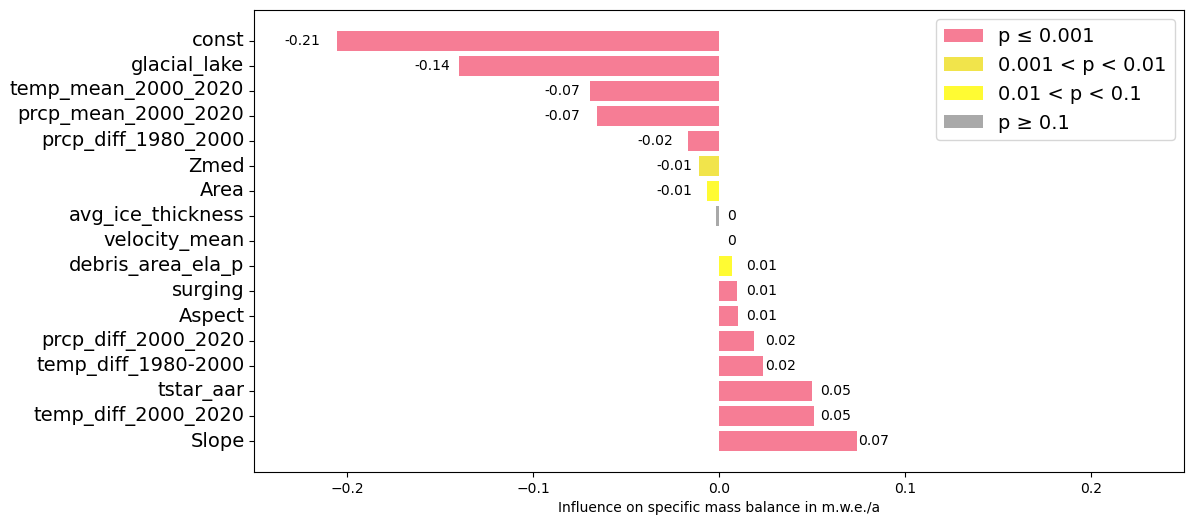

In [481]:
fig, ax = plt.subplots(1, figsize = (12,6))
plt.barh(df.Name, df['values'], color = colors, alpha = 0.8)


plt.yticks(fontsize=14, va='center')
ax.set_xlim(-0.25,0.25)
ax.bar_label(g, label_type="edge", padding = 6)
ax.set_xlabel("Influence on specific mass balance in m.w.e./a")

#for i, val in enumerate(df.Global_Sales.values):
 #   plt.text(val+0.5, i, val, fontsize = 14, va= 'center')
ax.legend(handles=legend_elements, loc = 'upper right', fontsize = 14)
plt.savefig('linear_regression_coefficients_bar.png', bbox_inches='tight', dpi=300)

plt.show()

## Get scoring metrics of model

In [95]:
regr = linear_model.LinearRegression(fit_intercept=True)

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

from sklearn.metrics import mean_squared_error

mae = np.mean(abs(y_pred - y_test))
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = metrics.r2_score(y_test, y_pred) #Rsquared

# Print out the mean absolute error (mae), R2 and RMSE
print('MAE:',mae)
print('RMSE', rmse)
print('R2:',r2)

MAE: 0.18596650056009958
RMSE 0.2415876951731548
R2: 0.32059127821389866


## Predicted vs Actual plot

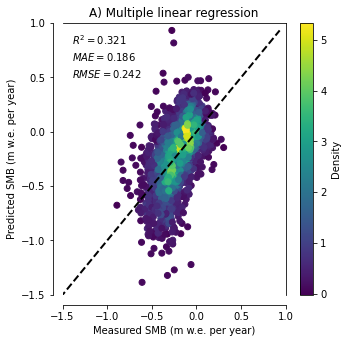

In [96]:
def density_scatter( x , y, ax = None, sort = True, bins = 20, **kwargs )   :
    """
    Scatter plot colored by 2d histogram
    """
    if ax is None :
        fig , ax = plt.subplots(figsize=(5,5))
    data , x_e, y_e = np.histogram2d( x, y, bins = bins, density = True )
    z = interpn( ( 0.5*(x_e[1:] + x_e[:-1]) , 0.5*(y_e[1:]+y_e[:-1]) ) , data , np.vstack([x,y]).T , method = "splinef2d", bounds_error = False)
    
    
    #To be sure to plot all data
    z[np.where(np.isnan(z))] = 0.0
    
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.scatter(x, y, c=z, **kwargs )
    ax.spines["left"].set_position(("outward", 10))
    ax.spines["bottom"].set_position(("outward", 10))
    ax.set_xlim([-1.5,1])
    ax.set_ylim([-1.5,1])
    ax.set_xlabel("Measured SMB (m w.e. per year)")
    ax.set_ylabel("Predicted SMB (m w.e. per year)")
    ax.annotate("$R^2={:.3f}$".format(r2), (-1.4, 0.8))
    ax.annotate("$RMSE={:.3f}$".format(rmse), (-1.4, 0.5))
    ax.annotate("$MAE={:.3f}$".format(mae), (-1.4, 0.65))

    ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "--k", linewidth=2)
    plt.title("A) Multiple linear regression")

    norm = Normalize(vmin = np.min(z), vmax = np.max(z))
    cbar = fig.colorbar(cm.ScalarMappable(norm = norm), ax=ax)
    cbar.ax.set_ylabel('Density')
    plt.savefig('linear_regression.png', bbox_inches='tight', dpi=300)

    return ax

if "__main__" == __name__ :
    density_scatter(y_pred, y_test, bins = [30,30] )

## Check for homoscedasticity based on visual inspection

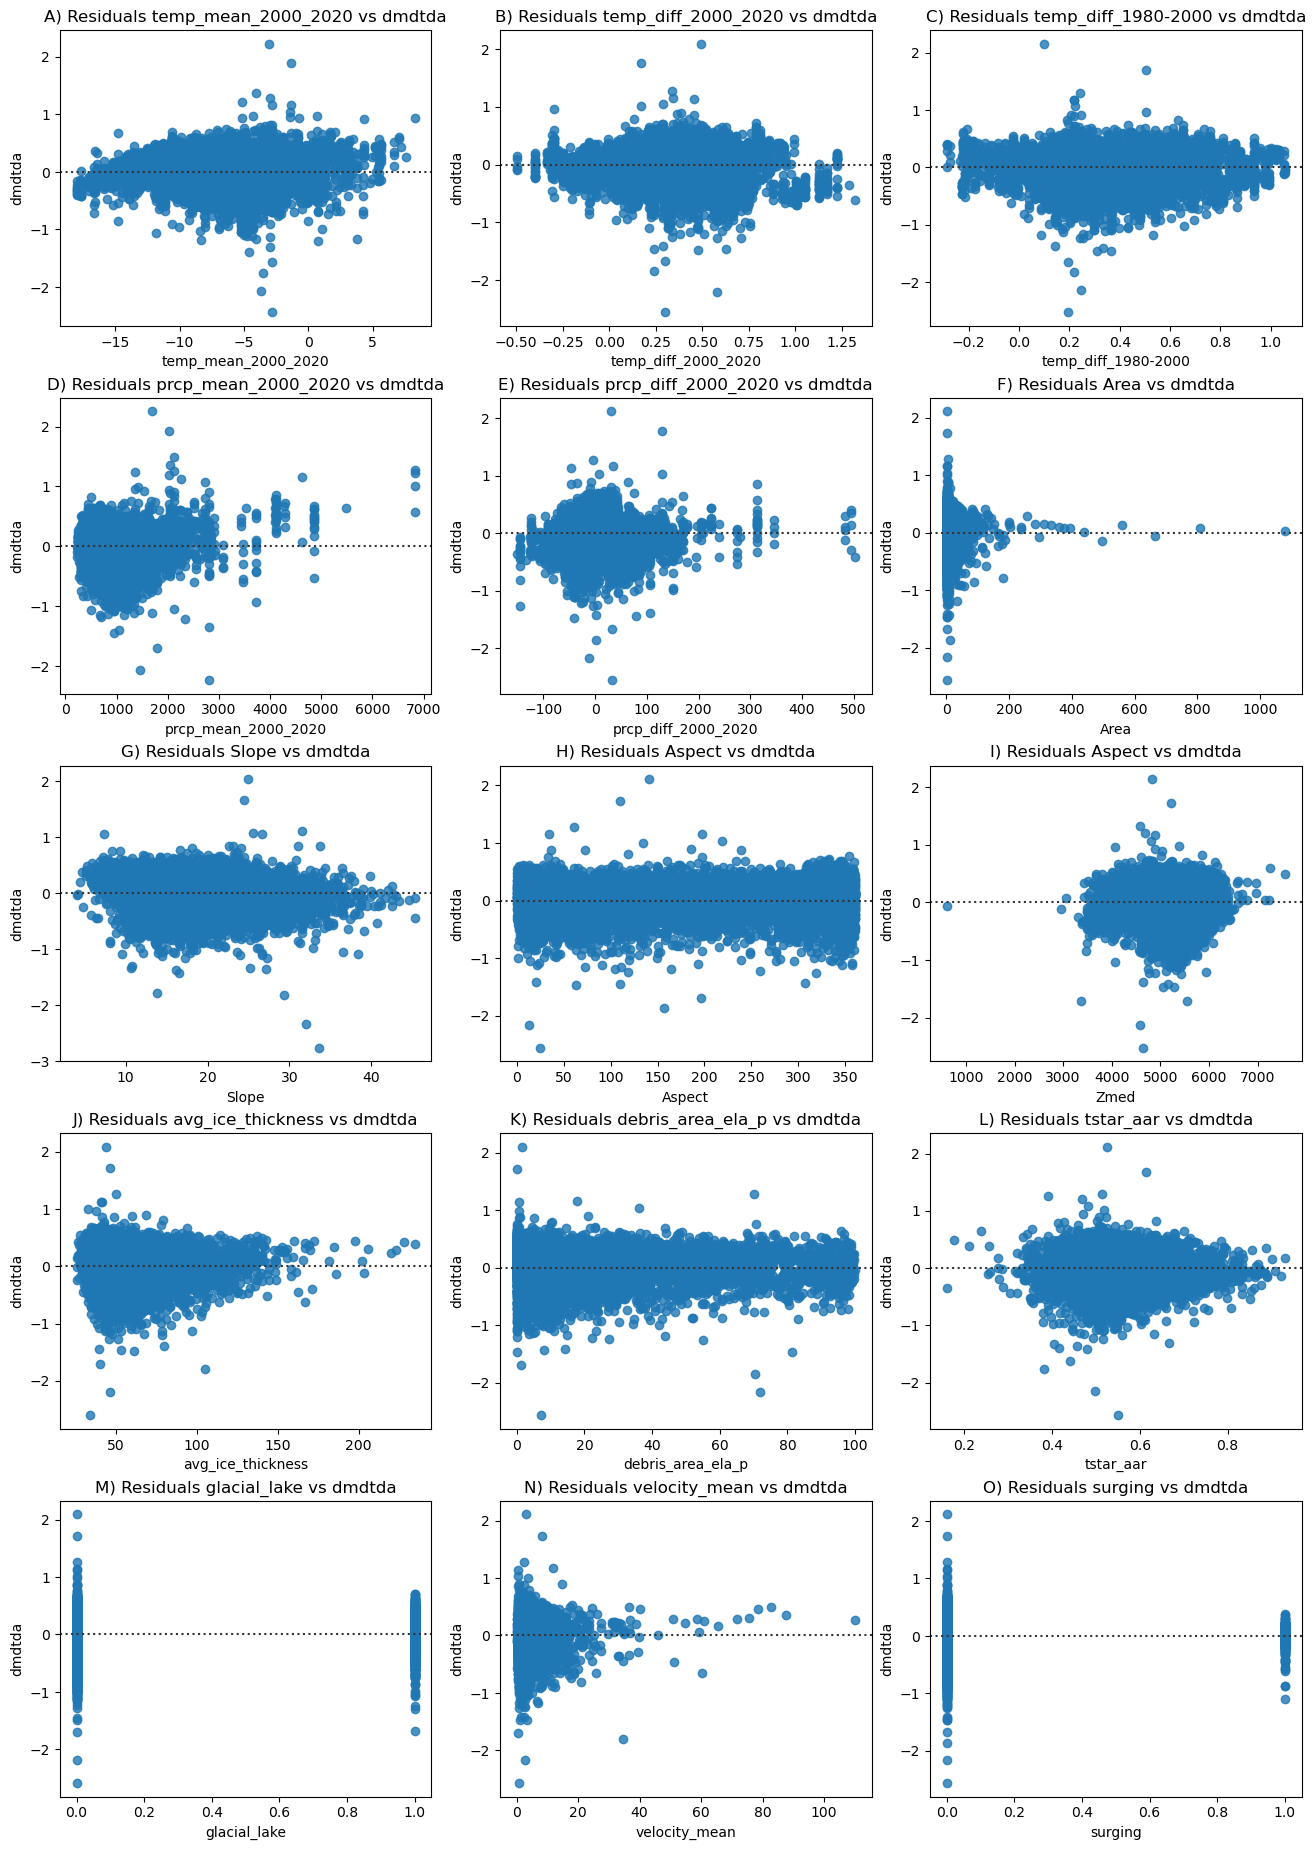

In [531]:
# Renaming the dataframe
data = df2000_2020

fig, axes = plt.subplots(5, 3, figsize=(13, 18.3846), constrained_layout=True)
#fig.tight_layout() # Or equivalently,  "plt.tight_layout()

# temp_mean_2000_2020
sns.residplot(ax = axes[0,0], x='temp_mean_2000_2020', y='dmdtda', data=data)
axes[0,0].set_title('A) Residuals temp_mean_2000_2020 vs dmdtda')

# temp_diff_2000_2020
sns.residplot(ax = axes[0,1], x='temp_diff_2000_2020', y='dmdtda', data=data)
axes[0,1].set_title('B) Residuals temp_diff_2000_2020 vs dmdtda')

# temp_diff_1980-2000
sns.residplot(ax = axes[0,2], x='temp_diff_1980-2000', y='dmdtda', data=data)
axes[0,2].set_title('C) Residuals temp_diff_1980-2000 vs dmdtda')

# prcp_mean_2000_2020
sns.residplot(ax = axes[1,0], x='prcp_mean_2000_2020', y='dmdtda', data=data)
axes[1,0].set_title('D) Residuals prcp_mean_2000_2020 vs dmdtda')

# prcp_diff_2000_2020
sns.residplot(ax = axes[1,1], x='prcp_diff_2000_2020', y='dmdtda', data=data)
axes[1,1].set_title('E) Residuals prcp_diff_2000_2020 vs dmdtda')

# Area
sns.residplot(ax = axes[1,2], x='Area', y='dmdtda', data=data)
axes[1,2].set_title('F) Residuals Area vs dmdtda')

# Slope
sns.residplot(ax = axes[2,0], x='Slope', y='dmdtda', data=data)
axes[2,0].set_title('G) Residuals Slope vs dmdtda')

# Aspect
sns.residplot(ax = axes[2,1], x='Aspect', y='dmdtda', data=data)
axes[2,1].set_title('H) Residuals Aspect vs dmdtda')

# Zmed
sns.residplot(ax = axes[2,2], x='Zmed', y='dmdtda', data=data)
axes[2,2].set_title('I) Residuals Aspect vs dmdtda')

# avg_ice_thickness
sns.residplot(ax = axes[3,0], x='avg_ice_thickness', y='dmdtda', data=data)
axes[3,0].set_title('J) Residuals avg_ice_thickness vs dmdtda')

# debris_area_ela_p
sns.residplot(ax = axes[3,1], x='debris_area_ela_p', y='dmdtda', data=data)
axes[3,1].set_title('K) Residuals debris_area_ela_p vs dmdtda')

# tstar_aar
sns.residplot(ax = axes[3,2], x='tstar_aar', y='dmdtda', data=data)
axes[3,2].set_title('L) Residuals tstar_aar vs dmdtda')

# glacial_lake
sns.residplot(ax = axes[4,0], x='glacial_lake', y='dmdtda', data=data)
axes[4,0].set_title('M) Residuals glacial_lake vs dmdtda')

# velocity_mean
sns.residplot(ax = axes[4,1], x='velocity_mean', y='dmdtda', data=data)
axes[4,1].set_title('N) Residuals velocity_mean vs dmdtda')

# surging
sns.residplot(ax = axes[4,2], x='surging', y='dmdtda', data=data)
axes[4,2].set_title('O) Residuals surging vs dmdtda')

plt.savefig('residuals_plot.png', bbox_inches='tight', dpi=300)


plt.show()



## Check for homoscedasticity with White and Breusch–Pagan test

In [87]:
statecrime_df = sm.datasets.statecrime.load_pandas().data
f ='dmdtda_zscore~temp_zscore+prcp_zscore+avg_ice_thickness_zscore+glacial_lake+debris_area_ela_p_zscore+Slope_zscore+Aspect_zscore+Area_zscore+Zmed_zscore'
model = ols(formula=f, data=df2000_2010).fit()
bp_test = het_breuschpagan(model.resid, model.model.exog)
white_test = het_white(model.resid, model.model.exog)
labels = ['LM Statistic', 'LM-Test p-value', 'F-Statistic', 'F-Test p-value']
print(dict(zip(labels, white_test)))
print(dict(zip(labels, bp_test)))

# Conclusion: heteroscadistic

{'LM Statistic': 338.919338561405, 'LM-Test p-value': 2.6305599980824025e-43, 'F-Statistic': 6.629492650438987, 'F-Test p-value': 1.980146168160754e-44}
{'LM Statistic': 199.23408133662224, 'LM-Test p-value': 4.794734739465082e-38, 'F-Statistic': 22.66740137935942, 'F-Test p-value': 1.5574985942225678e-38}


## Normality residuals

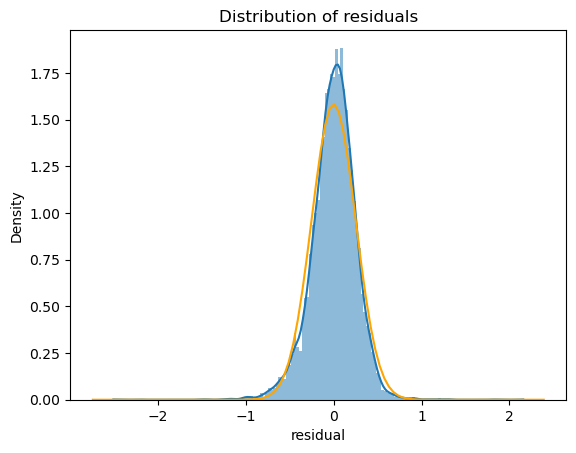

In [534]:
from scipy import stats
mu, std = stats.norm.fit(model.resid)
mu, std

import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()
# plot the residuals
sns.histplot(x=model.resid, ax=ax, stat="density", linewidth=0, kde=True)
ax.set(title="Distribution of residuals", xlabel="residual")

# plot corresponding normal curve
xmin, xmax = plt.xlim() # the maximum x values from the histogram above
x = np.linspace(xmin, xmax, 100) # generate some x values
p = stats.norm.pdf(x, mu, std) # calculate the y values for the normal curve
sns.lineplot(x=x, y=p, color="orange", ax=ax)
plt.show()

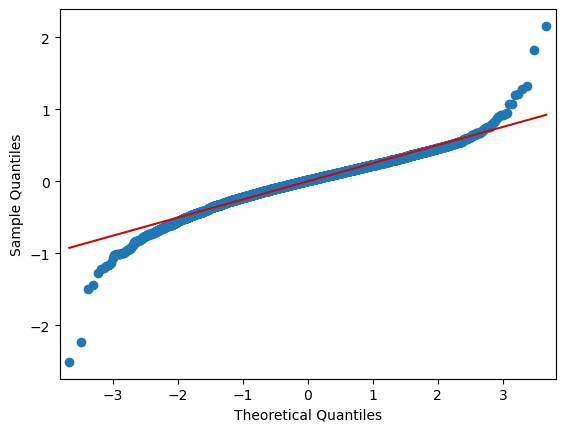

In [535]:
sm.qqplot(model.resid, line='s');
# Heavy-tailed